# Regressao - Séries Temporais - Prophet - Açudes da Paraíba
## Açude de Boqueirão - Com Recarga do Rio São Francisco (Abril/2017)
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531

In [42]:
# Usando o Facebook Prophet
#!pip install pystan
#!pip install fbprophet

In [2]:
# No Anaconda Python
# conda install gcc
# onda install -c conda-forge fbprophet

### Acude de Boqueirão com Recarga do Rio São Francisco - 03/05/2017 ate 01/05/2018

In [3]:
import pandas as pd

In [4]:
# leitura do dataset
# Acude de Boqueirão com Recarga do Rio São Francisco - 03/05/2017 ate 01/05/2018
df = pd.read_excel("Boqueirao-2017-2018.xlsx")
df.head()

,Unnamed: 0,Açude,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,0,Epitácio Pessoa,20/04/2017,2.92,12033034.63,58974.26
1,1,Epitácio Pessoa,21/04/2017,2.94,12121496.02,88461.39
2,2,Epitácio Pessoa,22/04/2017,2.98,12268931.67,147435.65
3,3,Epitácio Pessoa,23/04/2017,3.02,12445854.45,176922.78
4,4,Epitácio Pessoa,24/04/2017,3.08,12681751.49,235897.04


In [5]:
del df["Açude"]
del df["Unnamed: 0"]
df.head()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,20/04/2017,2.92,12033034.63,58974.26
1,21/04/2017,2.94,12121496.02,88461.39
2,22/04/2017,2.98,12268931.67,147435.65
3,23/04/2017,3.02,12445854.45,176922.78
4,24/04/2017,3.08,12681751.49,235897.04


In [6]:
df.tail()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
374,30/04/2018,35.13,1.446395e+08,0.00
375,01/05/2018,35.40,1.457439e+08,1104342.24
376,02/05/2018,35.58,1.464801e+08,736228.16
377,03/05/2018,35.63,1.466641e+08,184057.04
378,04/05/2018,35.67,1.468482e+08,184057.04


In [7]:
len(df)

379

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data do registro  379 non-null    object 
 1   Volume (%)        379 non-null    float64
 2   Volume (m³)       379 non-null    float64
 3   Aporte (m²)       379 non-null    float64
dtypes: float64(3), object(1)
memory usage: 12.0+ KB


In [9]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,2017-04-20,2.92,12033034.63,58974.26
1,2017-04-21,2.94,12121496.02,88461.39
2,2017-04-22,2.98,12268931.67,147435.65
3,2017-04-23,3.02,12445854.45,176922.78
4,2017-04-24,3.08,12681751.49,235897.04


In [10]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
del df2['Data do registro']
df2.head()

,Volume (%),Volume (m³),Aporte (m²)
Data do registro,,,
2017-04-20,2.92,12033034.63,58974.26
2017-04-21,2.94,12121496.02,88461.39
2017-04-22,2.98,12268931.67,147435.65
2017-04-23,3.02,12445854.45,176922.78
2017-04-24,3.08,12681751.49,235897.04


In [11]:
#del df2["Data do registro"]
df2.describe()["Volume (%)"]

count    379.000000
mean      10.493404
std        6.468186
min        2.920000
25%        7.535000
50%        9.240000
75%       10.220000
max       35.670000
Name: Volume (%), dtype: float64

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 2017-04-20 to 2018-05-04
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Volume (%)   379 non-null    float64
 1   Volume (m³)  379 non-null    float64
 2   Aporte (m²)  379 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [13]:
df2.head()

,Volume (%),Volume (m³),Aporte (m²)
Data do registro,,,
2017-04-20,2.92,12033034.63,58974.26
2017-04-21,2.94,12121496.02,88461.39
2017-04-22,2.98,12268931.67,147435.65
2017-04-23,3.02,12445854.45,176922.78
2017-04-24,3.08,12681751.49,235897.04


## Plota dados do açude de Boqueirão - 20/04/2017 ate 04/05/2018

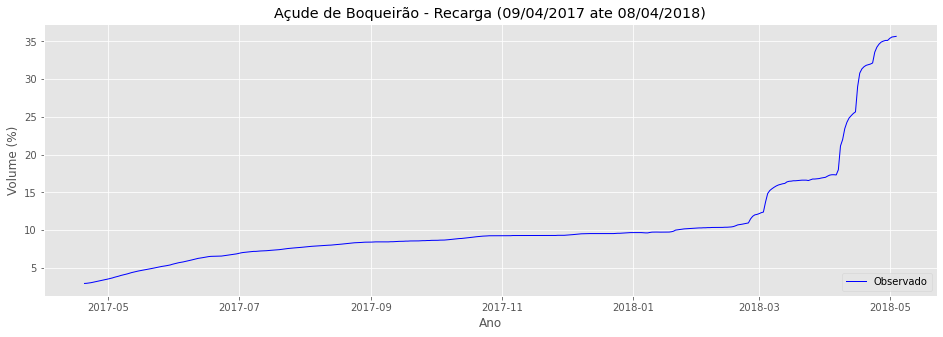

In [14]:
import matplotlib, matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16,5))
matplotlib.style.use("ggplot")

plt.plot(df2["Volume (%)"], color='blue', linewidth=1)
# adcionando textos
plt.title("Açude de Boqueirão - Recarga (09/04/2017 ate 08/04/2018)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Observado"], loc="lower right")
plt.show()

In [15]:
# criar uma coluna com os dias
df3 = df2
numero_de_dias_observados = len(df3)
df3["dia"] = range(1,numero_de_dias_observados+1)
df3.head()

,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,
2017-04-20,2.92,12033034.63,58974.26,1
2017-04-21,2.94,12121496.02,88461.39,2
2017-04-22,2.98,12268931.67,147435.65,3
2017-04-23,3.02,12445854.45,176922.78,4
2017-04-24,3.08,12681751.49,235897.04,5


In [16]:
print("numero_de_dias_observados = ",len(df3)) # numero de tuplas ou linhas ou medições

numero_de_dias_observados =  379


In [17]:
df3.tail()

,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,
2018-04-30,35.13,1.446395e+08,0.00,375
2018-05-01,35.40,1.457439e+08,1104342.24,376
2018-05-02,35.58,1.464801e+08,736228.16,377
2018-05-03,35.63,1.466641e+08,184057.04,378
2018-05-04,35.67,1.468482e+08,184057.04,379


## Preparar os dados para aplicar o modelo de regressao

In [18]:
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')
#X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]

X = df3['dia'].values.reshape(-1, 1)
y = df3['Volume (%)']

print(X[:3])
print(y[:3])

[[1]
 [2]
 [3]]
Data do registro
2017-04-20    2.92
2017-04-21    2.94
2017-04-22    2.98
Name: Volume (%), dtype: float64


## Aplicar o modelo de Regressao

In [19]:
# Aplicar o modelo de Regressao
olm = lm.LinearRegression()
olm.fit(X, y)
olm

LinearRegression()

## Métrica para avaliar o modelo
É uma métrica que mede os o quanto dos futuros examplos são previstos corretamente. <br>
Varia entre 0 e 1. Quanto mais o R² se aproximar de 1, melhor a previsão.<br>
Um R² próximo de 0, não reflete o modelo.

In [20]:
from sklearn.metrics import r2_score
import numpy as np

y_pred = olm.predict(df3['dia'].values.reshape(-1, 1))
# Evaluate the model

dfp = pd.DataFrame()
dfp['dia'] = df3['dia']
dfp['volume'] = df3['Volume (%)']
dfp['Vol_prev'] = y_pred
dfp['erro'] = np.abs(dfp['volume'] - dfp['Vol_prev'])
dfp['quadrado_erro'] = np.abs(dfp['volume'] - dfp['Vol_prev']) ** 2
dfp.head()

,dia,volume,Vol_prev,erro,quadrado_erro
Data do registro,,,,,
2017-04-20,1,2.92,1.990586,0.929414,0.863811
2017-04-21,2,2.94,2.035574,0.904426,0.817986
2017-04-22,3,2.98,2.080563,0.899437,0.808987
2017-04-23,4,3.02,2.125551,0.894449,0.800039
2017-04-24,5,3.08,2.170540,0.909460,0.827118


In [21]:
import numpy as np

np.sqrt(dfp.quadrado_erro.sum())

81.44069961913722

In [22]:
np.sqrt(dfp.erro.sum())

31.871490181116236

In [23]:
r2 = r2_score(y, y_pred)
print('r2 = ', r2 )

r2 =  0.5806021874539069


# Prophet - Séries Temporais

In [24]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [25]:
df.head()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,2017-04-20,2.92,12033034.63,58974.26
1,2017-04-21,2.94,12121496.02,88461.39
2,2017-04-22,2.98,12268931.67,147435.65
3,2017-04-23,3.02,12445854.45,176922.78
4,2017-04-24,3.08,12681751.49,235897.04


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Data do registro  379 non-null    datetime64[ns]
 1   Volume (%)        379 non-null    float64       
 2   Volume (m³)       379 non-null    float64       
 3   Aporte (m²)       379 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 12.0 KB


In [34]:
df2 = df[ ['Data do registro', 'Volume (%)' ] ]
df2 = df2.rename(columns={"Data do registro": "ds", "Volume (%)": "y"})
df2.head()

,ds,y
0,2017-04-20,2.92
1,2017-04-21,2.94
2,2017-04-22,2.98
3,2017-04-23,3.02
4,2017-04-24,3.08


In [35]:
m = Prophet()
m.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
739,2019-04-30
740,2019-05-01
741,2019-05-02
742,2019-05-03
743,2019-05-04


In [37]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
739,2019-04-30,140.155710,117.042863,163.274574
740,2019-05-01,140.450742,117.158974,164.490249
741,2019-05-02,140.715406,117.680469,165.381893
742,2019-05-03,140.978180,117.425643,164.974818
743,2019-05-04,141.284170,117.484019,165.298030


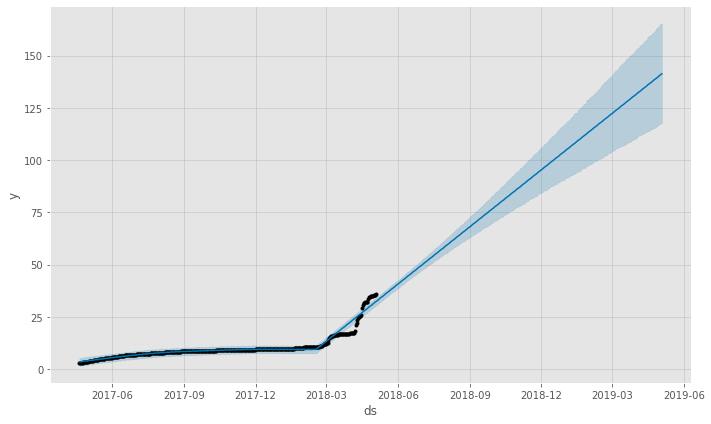

In [38]:
# Python
fig1 = m.plot(forecast)

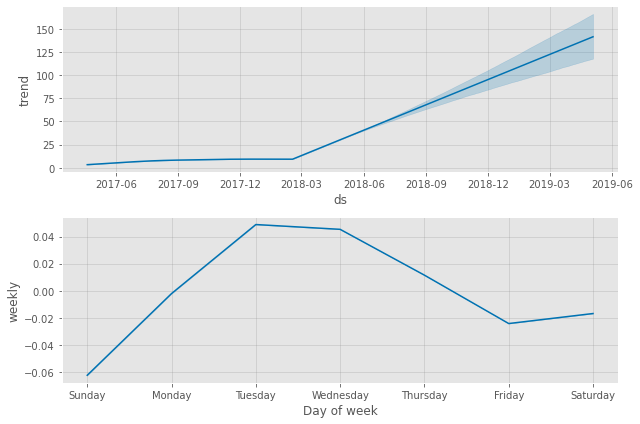

In [39]:
fig2 = m.plot_components(forecast)

## Plota os Dados Observados e Previstos

### preparando a saida para plotar

In [ ]:
# a reta de regressao
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

In [ ]:
x1 = 366 * 4
y1 = 0.04498845398456564 * x1 + 1.9455974368639257
y1

In [ ]:
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,8))

# Plot both data sets
plt.plot(X, y, color='blue',
         linewidth=1)
plt.plot(X, olm.predict(X), color='green',
         linewidth=1)

# Add decorations
plt.title("Açude de Boqueirão - 2017 (Depois da Recarga do São Francisco)")
plt.xlabel("Dia")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto",], loc="lower right")
print('reta de regressão')
print(' y = {0} * x + {1}'.format(a, b))
plt.show()

In [ ]:
list(olm.predict(X))[:3]

In [ ]:
import numpy as np

In [ ]:
numero_de_dias_observados

In [ ]:
dados3meses = np.array(numero_de_dias_observados + 90)
dados3meses

In [ ]:
olm.predict(dados3meses.reshape(-1, 1))[0]

In [ ]:
# predicao para 1 ano
dados = np.array(numero_de_dias_observados + 365).reshape(-1, 1)
pred = olm.predict(dados)[0] 
print ("Volume Boqueirão depois de um ano = %6.2f %%" % (pred))

In [ ]:
# predicao para 2 anos
dados = np.array((numero_de_dias_observados+365)*2).reshape(1, -1)
pred = olm.predict(dados)[0]  

print ("Volume Boqueirão depois de dois anos = %6.2f %%" % (pred))

In [ ]:
numero_de_dias_observados 

In [ ]:
# predicao até verter água - sangrar (100%) - Capacidade Máxima do Açude
ano=2018
dados = np.array((numero_de_dias_observados)).reshape(1, -1)
pred = olm.predict(dados)[0]
print ("Volume Boqueirão: Ano %d -> %-5.2f%%" % 
       (ano,pred))
dia = 1
while (True):
    x = np.array([(numero_de_dias_observados + dia)]).reshape(1, -1)
    pred = olm.predict(x)[0]  
    if pred >= 100:
        break
    if dia % 365 == 0:
        ano = ano +  1
        print ("Volume Boqueirão: Ano %d -> %-5.2f%%" % (ano,pred))
    dia = dia + 1
print ("Volume Boqueirão: Ano %d -> %-5.2f%%" % (ano,pred))

### Com os dados de recarga do São Francisco e dados de chuva, representados pelo Volume diário, <br /> O Açude de Boqueirão encherá em 4 anos (2022)

---